In [1]:
#import basic modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [2]:
#### standardized dataset
train_guild = pd.read_csv('../lite_data/train_guild_lite.csv')
train_label = pd.read_csv('../lite_data/train_label_lite.csv')

#### restored dataset
raw_train_activity = pd.read_csv('../transformed/real_values_int.csv')
raw_test_activity = pd.read_csv('../transformed/test_real_datas_int.csv')

#### 컬럼 순서 new_id / wk / 나머지....
cols = raw_train_activity.columns
raw_train_activity = raw_train_activity.loc[:,[cols[-1],cols[-2]] + cols[0:-2].tolist()].copy()
raw_test_activity = raw_test_activity.loc[:,[cols[-1],cols[-2]] + cols[0:-2].tolist()].copy()
cols = raw_train_activity.columns

#### error data
error_set = pd.read_csv('error_set_0.741.csv')

In [4]:
def incorrect_vals(y_val, val_pred):
    #val id
    incorrect_ids=np.array(y_val[np.array(y_val)!=val_pred].index)
    #원래 값
    incorrect_y_vals=np.array(y_val[np.array(y_val)!=val_pred])
    #예측값
    incorrect_val_pred=val_pred[np.array(y_val)!=val_pred]
    res=pd.DataFrame(np.array([incorrect_ids,incorrect_y_vals,incorrect_val_pred]).transpose(),columns=['ids','real','predicted'])
    res_with_key=res.copy()
    res_with_key['ids']=['tr' + str(x) for x in incorrect_ids]
    ct=pd.crosstab(res_with_key.real,res_with_key.predicted)
    sns.heatmap(ct, annot=True, fmt="d")
    return  res_with_key,res,ct

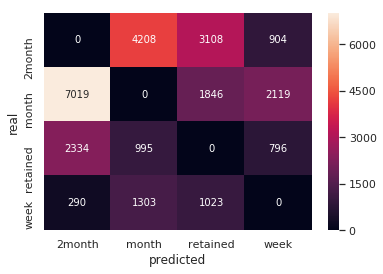

In [5]:
incorrects_with_key,incorrects, crosstab=incorrect_vals(error_set.label,error_set.y_pred)

---

In [3]:
#### first week로 subsetting
time_first = pd.read_csv('../Features/First_week.csv')
first_time_series = pd.merge(time_first, raw_train_activity)
first_time_series = first_time_series.loc[first_time_series.wk >= first_time_series.first_week,:]

In [6]:
guild_chat_diff_max = first_time_series.loc[:,['new_id','guild_chat']].groupby(by='new_id').last() - first_time_series.loc[:,['new_id','guild_chat']].groupby(by='new_id').max()
guild_chat_diff_min = first_time_series.loc[:,['new_id','guild_chat']].groupby(by='new_id').last() - first_time_series.loc[:,['new_id','guild_chat']].groupby(by='new_id').min()

In [15]:
guild_chat_diff_min

,guild_chat
new_id,
tr0,0
tr1,0
tr10,0
tr100,0
tr1000,0
tr10000,0
tr10001,0
tr10002,0
tr10003,119


In [10]:
guild_chat_diff_max.abs() / guild_chat_diff_min.abs()

,guild_chat
new_id,
tr0,NaN
tr1,NaN
tr10,NaN
tr100,NaN
tr1000,NaN
tr10000,NaN
tr10001,NaN
tr10002,NaN
tr10003,4.260504


In [10]:
guild_error_set = pd.merge(error_set, guild_chat_diff_max,left_on='new_id',right_on = guild_chat_diff_max.index)

In [12]:
sns.distplot(error_set.loc[(error_set.label=='week') & (error_set.y_pred=='retained')].guild_chat)

AttributeError: 'DataFrame' object has no attribute 'guild_chat'

In [12]:
error_set.loc[(error_set.label=='week') & (error_set.y_pred=='retained')].party_chat

,new_id,label,y_pred,party_chat
82,tr307,week,retained,6.0
84,tr310,week,retained,-5.0
96,tr363,week,retained,56.0
116,tr454,week,retained,-54.0
119,tr458,week,retained,208.0
139,tr557,week,retained,0.0
145,tr567,week,retained,7.0
154,tr606,week,retained,0.0
156,tr609,week,retained,0.0
167,tr641,week,retained,81.0


---

In [10]:
true_set = error_set.loc[error_set.label == error_set.y_pred]

In [11]:
train_guild_features = pd.read_csv('../MODELS/temp_data/temp_guild_train.csv')

In [12]:
true_in_guild = pd.merge(true_set, train_guild_features)

In [13]:
true_in_guild = pd.merge(true_in_guild, guild_chat_diff,left_on='new_id',right_on = guild_chat_diff.index)

In [14]:
true_in_guild = true_in_guild.loc[true_in_guild.num_guild!=0,:]

In [15]:
true_in_guild.shape

(12576, 11)

In [17]:
true_in_guild

,new_id,label,y_pred,num_guild,guild_size,net_lcc,net_DegCen,net_ClsCen,net_BetCen,net_EigCen,guild_chat
3,tr4,retained,retained,1,15,0.000000,0.000247,0.140118,2.445142e-04,3.552879e-04,-1703
16,tr19,retained,retained,2,30,1.166667,0.000493,0.285525,3.493885e-04,1.683002e-03,-241
56,tr77,retained,retained,2,19,0.066667,0.001562,0.342763,1.065301e-03,6.663631e-03,-103
60,tr83,retained,retained,4,26,3.085714,0.001973,0.561305,9.264876e-04,3.106269e-03,-31
64,tr91,retained,retained,1,3,0.000000,0.000000,0.000000,0.000000e+00,1.516613e-74,-524
67,tr95,retained,retained,1,20,0.143791,0.001480,0.174364,1.009798e-03,5.833357e-03,-484
68,tr96,retained,retained,3,36,0.493240,0.002466,0.500835,1.117316e-03,1.108735e-02,-633
79,tr110,retained,retained,1,2,0.000000,0.000000,0.000000,0.000000e+00,1.516613e-74,-54
91,tr130,week,week,1,8,0.276190,0.001233,0.175437,3.436413e-04,5.174919e-03,0
98,tr137,retained,retained,1,6,0.000000,0.000000,0.000000,0.000000e+00,1.516613e-74,-212


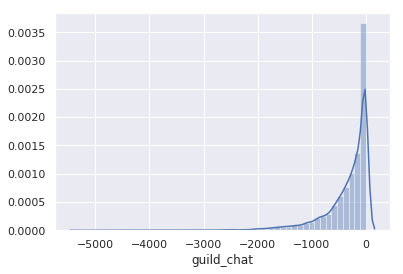

In [18]:
sns.distplot(true_in_guild.loc[(true_in_guild.label=='retained') & (true_in_guild.y_pred=='retained'),:].guild_chat)

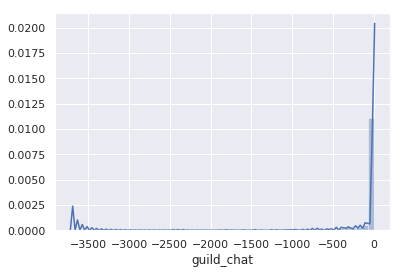

In [19]:
sns.distplot(true_in_guild.loc[(true_in_guild.label=='week') & (true_in_guild.y_pred=='week'),:].guild_chat)

---

In [10]:
train_guild_features = pd.read_csv('../MODELS/temp_data/temp_guild_train.csv')

In [8]:
error_set = error_set.loc[error_set.label != error_set.y_pred,:]

In [11]:
error_in_guild = pd.merge(error_set, train_guild_features)

In [12]:
error_in_guild = pd.merge(error_in_guild, guild_chat_diff,left_on='new_id',right_on = guild_chat_diff.index)

In [13]:
error_in_guild = error_in_guild.loc[error_in_guild.num_guild!=0,:]

In [15]:
error_in_guild.label.value_counts()

2month      1616
month       1342
week         764
retained     438
Name: label, dtype: int64

In [16]:
error_in_guild.y_pred.value_counts()

retained    2884
week         821
2month       233
month        222
Name: y_pred, dtype: int64

In [12]:
#### 길드가 있는 사람 중 에러
len(error_in_guild)

4160

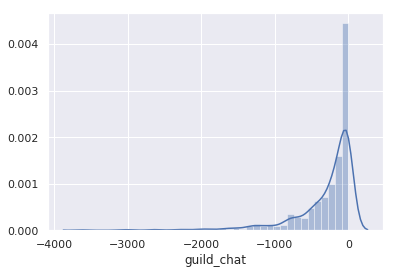

In [18]:
# week 2 retained
sns.distplot(error_in_guild.loc[(error_in_guild.label=='week') & (error_in_guild.y_pred=='retained'),:].guild_chat)

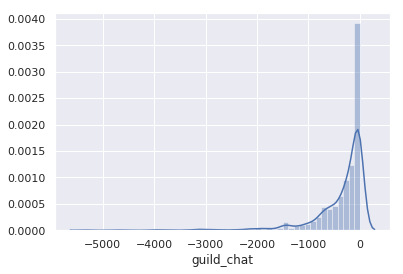

In [19]:
# week 2 retained
sns.distplot(error_in_guild.loc[(error_in_guild.label=='month') & (error_in_guild.y_pred=='retained'),:].guild_chat)

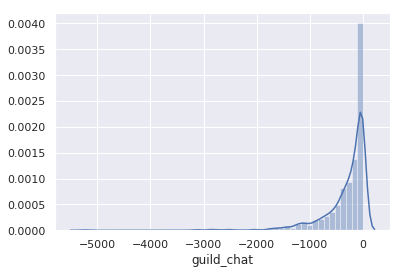

In [20]:
# week 2 retained
sns.distplot(error_in_guild.loc[(error_in_guild.label=='2month') & (error_in_guild.y_pred=='retained'),:].guild_chat)

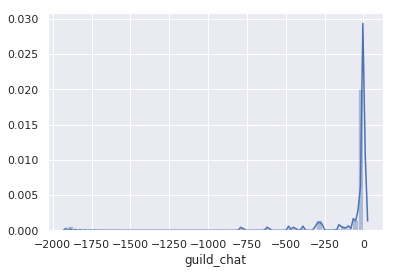

In [21]:
# retained 2 week
sns.distplot(error_in_guild.loc[(error_in_guild.label=='retained') & (error_in_guild.y_pred=='2month'),:].guild_chat)

In [19]:
error_in_guild.loc[(error_in_guild.label=='retained') & (error_in_guild.y_pred=='week'),:].guild_chat

14       -40
115     -179
169       54
220     -114
268      -49
513     -624
594        0
636       10
691      374
872       -3
1051      34
1098       0
1120      51
1440     -61
1449    -161
1806      -9
1889     -14
2285       0
2286     -55
2302     447
2375      -2
2414      15
2478       0
2512     216
2532      49
2701     -12
2721      -3
2964       0
2972     138
2998      -7
        ... 
23847     -7
23888    -84
23900    223
23912      0
23916    -10
24136    376
24423     41
24442      1
24458    -46
24468     22
24471    -48
24472      0
24493      5
24634    -53
24691      0
24809    -29
24826    119
24861     -1
25018      1
25179      0
25197    -59
25228    -55
25336      0
25452      0
25609    107
25648      0
25668     -9
25801      0
25833      0
25866      1
Name: guild_chat, Length: 269, dtype: int64

In [ ]:
error_in_guild_w2r

---

### 영빈이 한건

*
*
*
*
*

In [45]:
subset = (raw_train_activity.npc_exp!=0) & (raw_train_activity.npc_hongmun==0)

In [53]:
(raw_train_activity.loc[subset].loc[:,['cnt_enter_inzone_light']] != 0 ).sum()

cnt_enter_inzone_light    1062
dtype: int64

In [48]:
raw_train_activity.columns.tolist()

['new_id',
 'wk',
 'payment_amount',
 'cnt_dt',
 'play_time',
 'npc_exp',
 'npc_hongmun',
 'quest_exp',
 'quest_hongmun',
 'item_hongmun',
 'game_combat_time',
 'get_money',
 'duel_cnt',
 'duel_win',
 'partybattle_cnt',
 'partybattle_win',
 'cnt_enter_inzone_solo',
 'cnt_enter_inzone_light',
 'cnt_enter_inzone_skilled',
 'cnt_enter_inzone_normal',
 'cnt_enter_raid',
 'cnt_enter_raid_light',
 'cnt_enter_bam',
 'cnt_clear_inzone_solo',
 'cnt_clear_inzone_light',
 'cnt_clear_inzone_skilled',
 'cnt_clear_inzone_normal',
 'cnt_clear_raid',
 'cnt_clear_raid_light',
 'cnt_clear_bam',
 'normal_chat',
 'whisper_chat',
 'district_chat',
 'party_chat',
 'guild_chat',
 'faction_chat',
 'cnt_use_buffitem',
 'gathering_cnt',
 'making_cnt']